# Preliminary Stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as colors
from scipy.optimize import minimize
from scipy.special import gamma
cmap = cm.Greys

In [2]:
data = np.loadtxt('datafile_A3.txt')

# Question 1

Define the beta distribution

In [3]:
def beta_dist(x, a, b):
    return gamma(a+b)/(gamma(a)*gamma(b)) * x**(a-1) * (1-x)**(b-1)

Define the ** negative ** log likelihood distribution.

In [4]:
def neg_log_likelihood(params, data):
    alpha = params[0]
    beta = params[1]
    return -np.sum([np.log(beta_dist(x, alpha, beta)) for x in data], axis=0)

Minimize this distribution using scipy's minimization method, then print a summary of the results.

In [5]:
summary = minimize(neg_log_likelihood, x0=[4,5.5], args=data)
summary

      fun: -21.001087711326846
 hess_inv: array([[0.3489452 , 0.68024371],
       [0.68024371, 1.73476162]])
      jac: array([1.19209290e-06, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([2.8246642 , 6.02949818])

Obtain the maximum likelihood point estimates.

In [6]:
[alpha_best, beta_best] = summary.x

print(r'ML estimate for alpha: {}'.format(alpha_best))
print(r'ML estimate for beta: {}'.format(beta_best))

ML estimate for alpha: 2.8246641984639473
ML estimate for beta: 6.029498180847984


Obtain the standard deviation and correlation coefficients. Note that negative signs are not used (see slide 222 for context) because this hessian corresponds to the negative log likelihood.

In [7]:
hessian_inv = summary.hess_inv
var_alpha = hessian_inv[0][0]
var_beta = hessian_inv[1][1]
cov_alpha_beta = hessian_inv[0][1]
corr_coef = cov_alpha_beta/np.sqrt(var_alpha*var_beta)

print(r'Standard Deviation estimate using hessian: {}'.format(np.sqrt(var_alpha)))
print(r'Standard Deviation estimate using hessian: {}'.format(np.sqrt(var_beta)))
print(r'Correlation Coefficient estimate using hessian: {}'.format(corr_coef))

Standard Deviation estimate using hessian: 0.5907158377673619
Standard Deviation estimate using hessian: 1.317103495260734
Correlation Coefficient estimate using hessian: 0.8743111520317284


# Question 2

Get PDF and bins for histogram.

In [8]:
x = np.linspace(0,1,100)
best_pdf = beta_dist(x, alpha_best, beta_best)

bins = np.linspace(0, 1, 10)
area_norm = 40*(bins[1]-bins[0])

Plot.

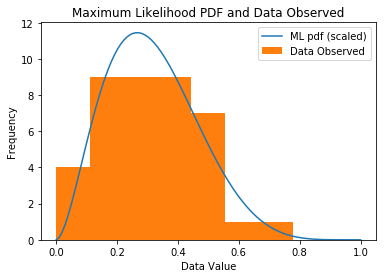

In [9]:
plt.plot(x, best_pdf*area_norm, label='ML pdf (scaled)')
plt.hist(data, bins=bins, label='Data Observed')
plt.legend()
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Maximum Likelihood PDF and Data Observed')
plt.show()

# Question 3

Obtain the contour values used for the plot.

In [10]:
max_likelihood = -summary.fun

x = np.linspace(1, 5, 1000)
y = np.linspace(2, 10, 1000)
xv, yv = np.meshgrid(x, y)
Z = -neg_log_likelihood([xv,yv], data)

contour_deltas = [0.5, 1.15, 2.31, 3.00]
contours = np.flip([max_likelihood-c for c in contour_deltas])

Plot.

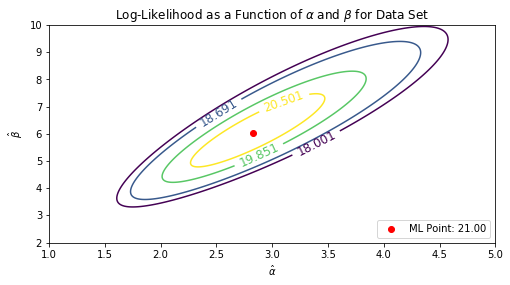

In [11]:
plt.figure(figsize=(8,4))
contour =  plt.contour(xv,yv,Z, levels=contours)
plt.clabel(contour, inline=1, fontsize=12)
plt.scatter(alpha_best, beta_best, color='r', label='ML Point: {:.2f}'.format(max_likelihood))
plt.xlabel(r'$\hat{\alpha}$')
plt.ylabel(r'$\hat{\beta}$')
plt.title(r'Log-Likelihood as a Function of $\alpha$ and $\beta$ for Data Set')
plt.legend(loc='lower right')
plt.show()

# Question 4

Now we just add some plt.axvline and plt.axhline to add the standard deviation limits.

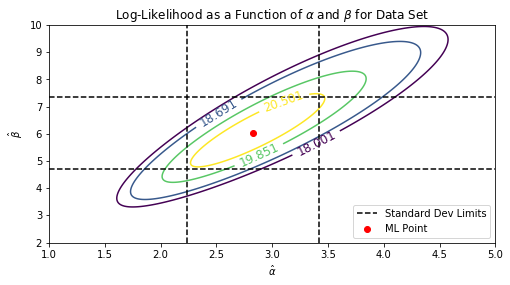

In [12]:
plt.figure(figsize=(8,4))
contour =  plt.contour(xv,yv,Z, levels=contours)
plt.clabel(contour, inline=1, fontsize=12)
plt.scatter(alpha_best, beta_best, color='r', label='ML Point')
plt.xlabel(r'$\hat{\alpha}$')
plt.ylabel(r'$\hat{\beta}$')
plt.title(r'Log-Likelihood as a Function of $\alpha$ and $\beta$ for Data Set')
plt.legend(loc='lower right')

# The new stuff
plt.axvline(alpha_best+np.sqrt(var_alpha), ls='--', color='k', label='Standard Dev Limits')
plt.axvline(alpha_best-np.sqrt(var_alpha), ls='--', color='k')
plt.axhline(beta_best-np.sqrt(var_beta), ls='--', color='k')
plt.axhline(beta_best+np.sqrt(var_beta), ls='--', color='k')

plt.legend(loc='lower right')
plt.show()

# Question 5

Since we are generating random variables, we will need to use the scipy pdf function

In [13]:
from scipy.stats import beta 

Generate 1000 data sets of size 40, and obtain $\hat{\alpha}$ and $\hat{\beta}$ for each.

In [14]:
data_sets = [beta.rvs(alpha_best, beta_best, scale = 1,  size = 40) for i in range(1000)]

For each of the 1000 data sets, obtain a maximum likelihood estimator for $\alpha$ and $\beta$.

In [15]:
params = np.array([minimize(neg_log_likelihood, x0=[2,6], args=data).x for data in data_sets])
alphas = params[:,0]
betas = params[:,1]

Print the quantities:

In [25]:
print(r'Mean alpha: {}'.format(np.mean(alphas)))
print(r'Mean beta: {}'.format(np.mean(betas)))
print(r'Std_dev alpha: {}'.format(np.std(alphas)))
print(r'Std_dev beta: {}'.format(np.std(betas)))
print(r'Correlation Coefficient: {}'.format(np.corrcoef(alphas, betas)[0,1]))

Mean alpha: 3.056767069889532
Mean beta: 6.58537276594164
Std_dev alpha: 0.687340918920731
Std_dev beta: 1.6210541558898954
Correlation Coefficient: 0.8919384155646376


## Part A

Note that the standard deviations from (1.) are **not** good estimators for the true standard deviation. This is likely due to equation (6.16) in Cowan. Note that while this equation onlt holds for a single parameter, it transfers to multiple parameters as well.

$$V[\hat{\theta}] \geq \left(1+\frac{db}{d\theta} \right)^2 / E\left[-\frac{\partial^2 \ln L}{\partial \theta^2} \right] $$

Equality holds in the large sample limit, but in our case our sample is only $n=40$. In addition, depending on how the bias $b$ depends on $\theta$, our use of the hessian to approximate the variance may be a poor estimate.